# L6 Synthetic Biology (Toggle Switch)

## Overview

In this notebook we will explore the concept of bistability in genetic circuits. Bistability is the phenomena where a dynamical system has two different stable states. The system will sit in either of these states until it is perturbed or induced to switch to the other. In populations of cells that are randomly perturbed and switching between states this leads to bimodal distributions, which can be useful for diversifying phenotypes and bet-hedging. In genetic circuits bistabilty can lead to all-or-none dynamics, where genes are either turned all the way on or all the way off in response to a stimuli. Bistability is also used to make cellular memory units that respond to and remember specific transient inputs. We will start by analyzing a simple form of bistability that arises from positive autoregulation with ultrasensitivity. We will then look at bistability in the model for a genetic toggle switch from [Gardner et al](https://www.nature.com/articles/35002131). 


In [ ]:
%reset

In [ ]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


### Bistability (Positve Autoregulation with Ultrasensitivty)

We will start with a simple model of gene regulation that leads to bistability (the gene is off or on). In this circuit, the gene exhibits positive autoregulation, it increases its own expression. This positive effect is also ultrasensitive, it has a sharper sensitivity to protein concentration than a standard Michaelis Menten curve. We will explore what these dynamics look like and how they arise using the Hill equation.

We can express the dynamics of protein concentration using the following equation: 

$\large \frac{dx}{dt} = \frac{Cx^{n}}{k^{n}+x^{n}} - \alpha x$

Here the first term is a positive autoregulation Hill equation, and the second is a linear protein dependent degredation. The Hill equation has two parameters: $k$ is the half maximal concnetration (analogous to $K_M$ in the Michaelis Menten equation), and $n$ is the Hill coefficient. A general rule for the Hill coefficient is that it coresponds to the number of monomers the regulator is made from, so if the protein regulating expression is a dimer (two proteins that bind together) then $n=2$. A Hill coefficient greater than 1 ($n>1$) leads to ultrasensitivity and bistability.

We will plot the positive and negative components of this function against x to graphically visualize the dynamics of the system, and understand where the steady states occur ($\frac{dx}{dt}=0$).

In [ ]:
x = np.linspace(0,10,100)
n = 3
k = 2
C = 1
alpha = 0.15
positive = C*x**n/(k**n+x**n)
negative = alpha * x

[fig,axs] = plt.subplots(1,1,figsize=[5,5])
axs.plot(x,positive,'r')
axs.plot(x,negative,'b')
axs.set_xlabel('protein concentration (x)')
axs.set_ylabel('rates')
axs.legend(['Positive','Negative']);

#### QUESTION 1
1. For the given parameters (n=3, k=2, C=1, alpha = 0.15):
    * a. How many steady states (both stable and unstable) does the system have?
    * b. Which are the stable and unstable steady states?

#### QUESTION 2
2. Keeping the other parameters constant, change the value of the parameter for degradation rate $\alpha$.
    * a. Does the system maintain bistability independent of the value of $\alpha$?
    * b. Generate and include a new plot with a different $\alpha$ value to explain your answer.

#### QUESTION 3
3. Generate a plot of the positive component of the dynamics (the Hill equation) for a Hill coefficient of $n=1$, $n=2$, $n=3$, and $n=10$.
   * a. Plot all of these curves on the same plot.
   * b. Based on the shape of these curves, explain why bistability requires a Hill coefficient greater than 1.

### Bistability (The Toggle Switch)

The synthetic toggle switch from [Gardner et al](https://www.nature.com/articles/35002131) is an engineered gene curcuit that leads to bistability. In this case the two stable states correspond to the expression of two different proteins (rather than the expression or lack of expression of a single protein in the positive autoregulation with ultrasensitivity example). In the toggle switch, each of the proteins that is expressed represses the expression of the other. This paper was one of the first examples of a completely synthetic engineered gene circuit that was designed with insight from computational modeling.

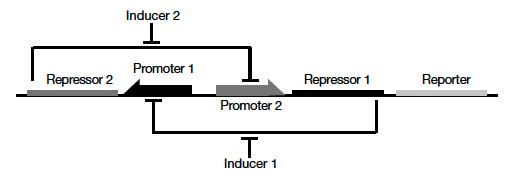

#### Dimensionless Dynamics

The dynamics of the toggle switch gene circuit system are given in a "dimensionless" form. Here $u$ and $v$ are the two protiens. Production is modeled with a repressor Hill function, and degradation is protein concentration dependent. The equation is non-dimensionalized such that the only parameters are $\alpha_{1}$ and $\alpha_{2}$ (the relative expression strengths) and $\beta$ and $\gamma$ the expression ultrasensitivity. The derivation in the appendix shows how these equations relate to the more familiar "dimensional" equations we have used in the past, with more easily interpereted parameters.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v$



#### Nullclines

We can analyze the dynamics of this system by looking at the nullclines. Nullclines are the manifolds of the system along which the rate of change of a variable is equal to 0. This system has two nullclines, one for the rate of change of $u$ and one for the rate of change of $v$. They can be found by setting the rates of change equal to zero in the above equations.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u = 0$

$\large u =  \frac{\alpha_{1}}{(1+v^{\beta})}$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v = 0$

$\large v = \frac{\alpha_{2}}{(1+u^{\gamma})}$

By plotting the nullclines we can identify the steady states of the system (where the two lines intersect) and begin to paint a "phase portrait" that describes the system dynamics.


In [ ]:
# Plotting nullclines
beta = 3
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

x_max = 15
x = np.linspace(0,x_max,1000)

u = alpha_1/(1+x**beta)
v = alpha_2/(1+x**gamma)

[fig,axs] = plt.subplots(1,1,figsize=[5,5])
axs.plot(u,x,'r')
axs.plot(x,v,'b')
axs.set_xlabel('u')
axs.set_ylabel('v')
axs.legend(['du/dt = 0','dv/dt = 0']);

We can explore the dynamics of the system by plotting them on this same graph. Note that here we are plotting the two variables $u$ and $v$ againts each other. Rather than our typical plot of some variable over time. We will define the differential equations so we can simulate dynamics. We will then plot the trajectory of the dynamics on the graph of $u$ vs $v$.

In [ ]:
# Define function
def TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma):    
    #y[0] = u
    #y[1] = v
    
    dydt = np.zeros(2)
    
    dydt[0] = alpha_1/(1+y[1]**beta) - y[0]
    dydt[1] = alpha_2/(1+y[0]**gamma) - y[1]
    
    return dydt

In [ ]:
[fig,axs] = plt.subplots(1,1,figsize=[5,5])

# Simulate dynamics
# Initial Conditions
y0 = [10,5]
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]
ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0,t_eval=t)
# Plot dynamics
axs.plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
axs.plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3) #starting point

# Plot nullclines
axs.plot(u,x,'r')
axs.plot(x,v,'b')
axs.set_xlabel('u')
axs.set_ylabel('v')


##### QUESTION 4
4. The code above plots the dynamics for an initial condition of $u=10$, $v=5$. Try out a few other initial conditions for this plot.
   * a. How many steady states are there?
   * b. Explain which steady states are stable and unstable?


#### Stability Analysis

In the paper, we saw that the toggle switch does not function if the $\alpha$'s are too miss-matched, or if at least one of the repressors does not exhibit ultrasensivity. We will adjust the paramters of the equations and simulate dynamics to explore when the toggle switch architechture does and does not give rise to bistability.

Here we will add a new plot that shows the parameters of the system (Figure 2 c, d from the paper). From the paper, we can see that there is an intermediate region of bistability when the $\alpha$ values fall within a cone that has slopes dictaded by the $\beta$ and $\gamma$ values. This region was estimated for high $\alpha$'s so it is an approximation, but it does a fairly good job of describing when the toggle switch will become bistable.

We will approximate the region shown in Figure 2 c, and d, with two lines. The equations for the lines bounding this region are given by:

$\large log(\alpha_{1})=\beta *log(\alpha_{2})$

$\large log(\alpha_{1})=\frac{1}{\gamma} *log(\alpha_{2})$


In [ ]:
# Plotting Dynamics
beta = 3
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

x_max = 15
x = np.linspace(0,x_max,1000)

u = alpha_1/(1+x**beta)
v = alpha_2/(1+x**gamma)

[fig,axs] = plt.subplots(1,2,figsize=[9,4])
axs[0].plot(u,x,'r')
axs[0].plot(x,v,'b')
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].legend(['du/dt = 0','dv/dt = 0']);

# Simulate dynamics
for i in range(10):
    # Initial Conditions
    y0 = 10*np.random.rand(2)
    # time span
    t = np.linspace(0,10,1000)
    tspan = [t[0],t[-1]]
    ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0,t_eval=t)
    # Plot dynamics
    axs[0].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
    axs[0].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3)

x_max_2 = 10
x2 = np.linspace(0,x_max_2,100)
y1 = (1/gamma)*x2
y2 = (beta)*x2
axs[1].plot(x2,y1,'k:')
axs[1].plot(x2,y2,'k:')
axs[1].plot(np.log(alpha_2),np.log(alpha_1),'r.')
axs[1].set_xlabel('log(alpha_2)')
axs[1].set_ylabel('log(alpha_1)')
axs[1].set_ylim([0,x_max_2])



##### QUESTION 5
5. We know from the reading that we need at least one repressor with ultrasensitivity and the $\alpha$ values to be balance to get bistablity.
    * a. Adjust the $\beta$ and $\gamma$ parameters to remove the bistability. Include a modified version of the plot above and explain how adjusting $\beta$ and $\gamma$ can remove the bistability.
    * b. Adjust the $\alpha$ parameters to remove the bistability. Include a modified version of the plot above and explain how adjusting $\alpha$ can remove the bistability.

## Appendix

### Dimensionless Dynamics Derivation

The dynamics of the toggle switch gene circuit system are given in a "dimensionless" form:

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v$

How are these dynamics related to the Hill equation dynamics we saw before? The dynamics for a protein that has a repressor production term and a degradation term were given in the [last paper](https://pubmed.ncbi.nlm.nih.gov/12417193/) as:

$\large \frac{dx_{2}(t)}{dt}=\frac{\beta_{2}}{1+\frac{x_{2}^{n}}{k^{n}}}-\alpha x_{2}$ Where $n=1$.

We can use this to write the "dimensional" equations for the toggle switch, we will use $A$ and $B$ for the degredation and repressor parameters and $U$ and $V$ for the dimensional protein concentrations to avoid confusion from variable overlap:

$\large \frac{dU}{dt}=\frac{B_{1}}{(1+\frac{V^{n_{1}}}{K_{1}^{n_{1}}})}-A_{1} U$

$\large \frac{dV}{dt}=\frac{B_{2}}{(1+\frac{U^{n_{2}}}{K_{2}^{n_{2}}})}-A_{2} V$

The units here are:

$\large \frac{dU}{dt},\frac{dV}{dt},B_{1},B_{2}: \frac{concentration}{time}$

$\large U,V,K_{1},K_{2}: concentration$

$\large A_{1},A_{2}: \frac{1}{time}$

To get the dimensionless equations, we will measure time in units of the degredation rate $A$ ($\tau_{1} = A_{1}*t$, $\tau_{2} = A_{2}*t$) and we will measure concentration of U and V in units of $\frac{1}{K}$ ($u = \frac{U}{K_{2}}, v = \frac{V}{K_{1}}$). Note that these units are not necessarily the same for the two equations unless we also make the simplifying assumption that $A_{1} = A_{2} = A$ and $K_{1} = K_{2} = K$. Below we will show the derivation of the dimensionless equation for the rate of change of $u$.

Using the chain rule, we can get an expression for our new differential equation for $u$ and visa-versa for $v$:

$\large \frac{du}{d\tau_{1}} = \frac{dU}{dt} \frac{du}{dU} \frac{dt}{d\tau_{1}}$

We can plug in our differential equation for $\frac{dU}{dt}$ and solve for the other derivatives from the difinitions of our new variables above:

$\large \frac{du}{d\tau_{1}} = (\frac{B_{1}}{(1+\frac{V^{n_{1}}}{K_{1}^{n_{1}}})}-A_{1}U)(\frac{1}{K_{2}})(\frac{1}{A_{1}})$

Substituting in $U=K_{2}u$ and $\frac{V}{K_{1}} = v$ we get a form of the equation that matches the dimensionless form in the paper:

$\large \frac{du}{d\tau_{1}} = (\frac{B_{1}}{(1+v^{n_{1}})}-A_{1}K_{2}u)(\frac{1}{K_{2}})(\frac{1}{A_{1}})$

$\large \frac{du}{d\tau_{1}} = \frac{B_{1}}{A_{1}K_{2}}\frac{1}{(1+v^{n_{1}})}-u$

Comparing the equation above with the dimensionless equations from the paper, we can relate the parameters from the dimensionless equations to the parameters from our more familiar Hill equation form as:

$\beta = n_{1}$

$\gamma = n_{2}$

$\alpha_{1} = \frac{B_{1}}{A_{1}K_{2}}$

$\alpha_{2} = \frac{B_{2}}{A_{2}K_{1}}$